In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import matplotlib.ticker as mtick

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

In [10]:
df = pd.read_csv("../GB_Python_Analytics/kc_house_data.csv", encoding="latin-1")

In [8]:
df2 = pd.read_csv("../GB_Python_Analytics/laptop_price.csv", encoding="latin-1")

## Задание 1

### 1.2. Изучите стоимости недвижимости

### 1.3. Изучите распределение квадратуры жилой

### 1.4. Изучите распределение года постройки

#### Постройте график
#### Назовите график
#### Сделайте именование оси x и оси y
#### Сделайте выводы

In [11]:
df.head()

id             date                price  bedrooms  \
0  7129300520  20141013T000000           221,900.00         3   
1  6414100192  20141209T000000           538,000.00         3   
2  5631500400  20150225T000000           180,000.00         2   
3  2487200875  20141209T000000           604,000.00         4   
4  1954400510  20150218T000000           510,000.00         3   

             bathrooms  sqft_living  sqft_lot               floors  \
0                 1.00         1180      5650                 1.00   
1                 2.25         2570      7242                 2.00   
2                 1.00          770     10000                 1.00   
3                 3.00         1960      5000                 1.00   
4                 2.00         1680      8080                 1.00   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      7        2170            400      1951   
2           0     0  ...      6         770              0      1933   
3           0     0  ...      7        1050            910      1965   
4           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode                  lat                 long  \
0             0    98178                47.51              -122.26   
1          1991    98125                47.72              -122.32   
2             0    98028                47.74              -122.23   
3             0    98136                47.52              -122.39   
4             0    98074                47.62              -122.05   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [21]:
df.price.nunique()

4028

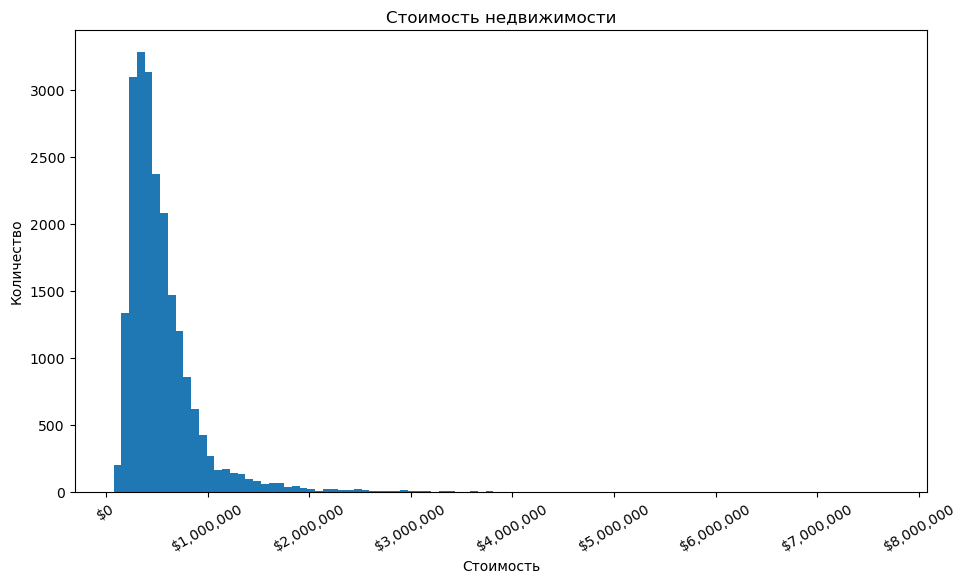

In [34]:
fig, ax_12 = plt.subplots(figsize=(11, 6))
ax_12.hist(df['price'], bins=100)
ax_12.set_title('Стоимость недвижимости')
ax_12.set_xlabel('Стоимость')
ax_12.set_ylabel('Количество')

tick = mtick.StrMethodFormatter('${x:,.0f}')
ax_12.xaxis.set_major_formatter(tick)
plt.xticks(rotation=30)

plt.show();

In [26]:
df.sqft_living.nunique()

1038

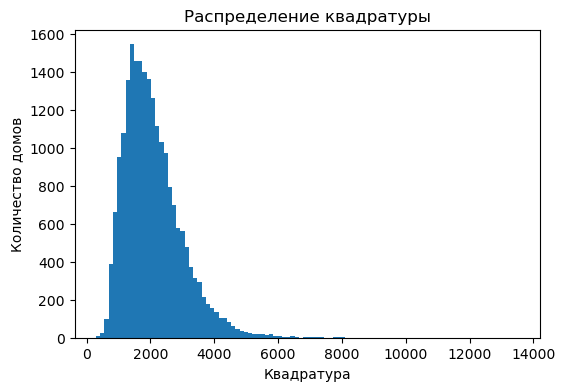

In [27]:
plt.figure(figsize=(6, 4))
plt.hist(df['sqft_living'], bins=100)
plt.title('Распределение квадратуры')
plt.xlabel('Квадратура')
plt.ylabel('Количество домов');

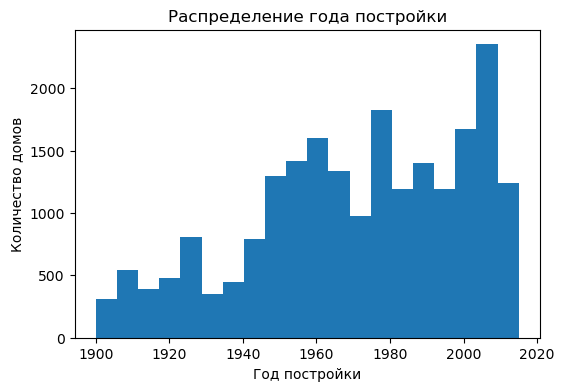

In [31]:
plt.figure(figsize=(6, 4))
plt.hist(df['yr_built'], bins=20)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

## Выводы 1

1) В целом, видно, что подавляющее большинство домов стоит до 1 млн долларов. Средняя цена колеблется в диапазоне от 300 до 600 тысяч.

2) В основном квадратура - о 500 до 4 000 футов. С пиком в районе 1 000 - 1 200.

3) Отметим, чо в нашей базе не так много старых домов. Начиная с 1950-х заметный всплеск количества. Пиковая пятилека по количеству - с 2005 по 2010 года.

## Задание 2

### 2.1. Изучите распределение домов от наличия вида на набережную
#### Постройте график
#### Сделайте выводы

### 2.2. Изучите распределение этажей домов

### 2.3. Изучите распределение состояния домов

In [41]:
df['view'] = df['view'].apply(lambda x: x if x == 0 else 1)

In [42]:
view = df['view'].value_counts()
view.head()

0    19489
1     2124
Name: view, dtype: int64

In [49]:
names = view.index
values = view.values

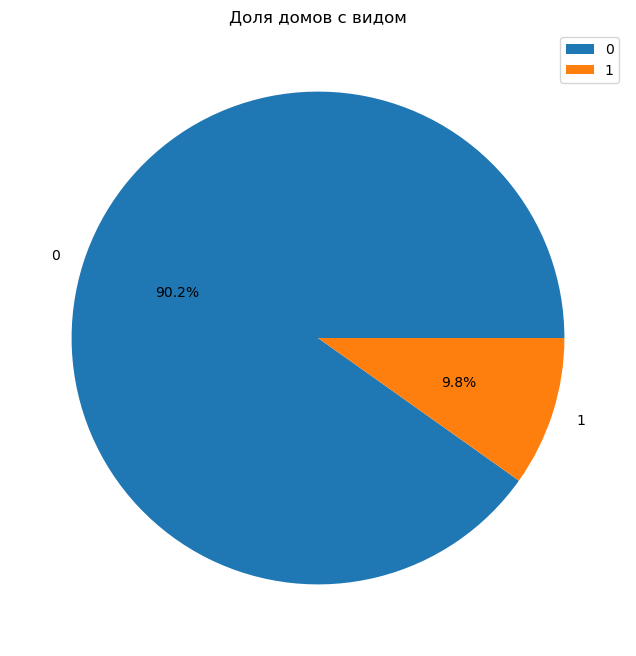

In [50]:
plt.figure(figsize=(10, 8))
plt.pie(values, autopct='%1.1f%%', labels=names)
plt.title('Доля домов с видом')
plt.legend(names, loc='upper right');

In [54]:
data1 = df['floors'].value_counts()

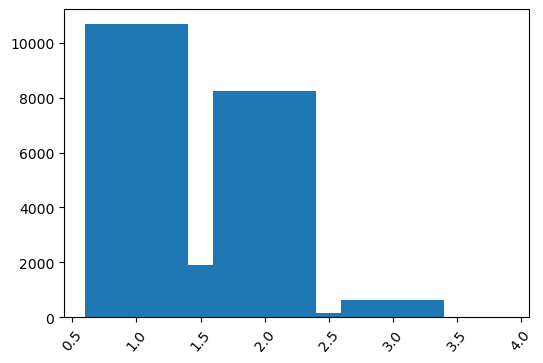

In [59]:
plt.figure(figsize=(6, 4))
plt.bar(data1.index, data1.values)
plt.xticks(rotation=50);

In [56]:
df['floors'].min(), df['floors'].max()

(1.0, 3.5)

In [57]:
df.describe()

id                price             bedrooms  \
count            21,613.00            21,613.00            21,613.00   
mean      4,580,301,520.86           540,088.14                 3.37   
std       2,876,565,571.31           367,127.20                 0.93   
min           1,000,102.00            75,000.00                 0.00   
25%       2,123,049,194.00           321,950.00                 3.00   
50%       3,904,930,410.00           450,000.00                 3.00   
75%       7,308,900,445.00           645,000.00                 4.00   
max       9,900,000,190.00         7,700,000.00                33.00   

                 bathrooms          sqft_living             sqft_lot  \
count            21,613.00            21,613.00            21,613.00   
mean                  2.11             2,079.90            15,106.97   
std                   0.77               918.44            41,420.51   
min                   0.00               290.00               520.00   
25%                   1.75             1,427.00             5,040.00   
50%                   2.25             1,910.00             7,618.00   
75%                   2.50             2,550.00            10,688.00   
max                   8.00            13,540.00         1,651,359.00   

                    floors           waterfront                 view  \
count            21,613.00            21,613.00            21,613.00   
mean                  1.49                 0.01                 0.10   
std                   0.54                 0.09                 0.30   
min                   1.00                 0.00                 0.00   
25%                   1.00                 0.00                 0.00   
50%                   1.50                 0.00                 0.00   
75%                   2.00                 0.00                 0.00   
max                   3.50                 1.00                 1.00   

                 condition                grade           sqft_above  \
count            21,613.00            21,613.00            21,613.00   
mean                  3.41                 7.66             1,788.39   
std                   0.65                 1.18               828.09   
min                   1.00                 1.00               290.00   
25%                   3.00                 7.00             1,190.00   
50%                   3.00                 7.00             1,560.00   
75%                   4.00                 8.00             2,210.00   
max                   5.00                13.00             9,410.00   

             sqft_basement             yr_built         yr_renovated  \
count            21,613.00            21,613.00            21,613.00   
mean                291.51             1,971.01                84.40   
std                 442.58                29.37               401.68   
min                   0.00             1,900.00                 0.00   
25%                   0.00             1,951.00                 0.00   
50%                   0.00             1,975.00                 0.00   
75%                 560.00             1,997.00                 0.00   
max               4,820.00             2,015.00             2,015.00   

                   zipcode                  lat                 long  \
count            21,613.00            21,613.00            21,613.00   
mean             98,077.94                47.56              -122.21   
std                  53.51                 0.14                 0.14   
min              98,001.00                47.16              -122.52   
25%              98,033.00                47.47              -122.33   
50%              98,065.00                47.57              -122.23   
75%              98,118.00                47.68              -122.12   
max              98,199.00                47.78              -121.31   

             sqft_living15           sqft_lot15  
count            21,613.00            21,613.00  
mean              1,986.55    

In [58]:
data2 = df['condition'].value_counts()

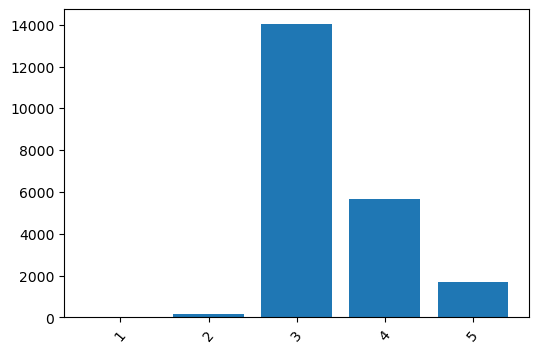

In [60]:
plt.figure(figsize=(6, 4))
plt.bar(data2.index, data2.values)
plt.xticks(rotation=50);

## Выводы 2

1) Лишь у 10% домов есть вид на море. Очень жаль.

2) Больше всего одноэтажных и двуэтажных домов. На третьем месте полутораэтажные дома. Остается лишь гадать о чем идет речь.

3) В целом, в нашей базе представлены дома среднего качества. Но радует, что хороших (4) и отличных (5) больше, чем плохих (2).

### Задание 3

#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

#### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

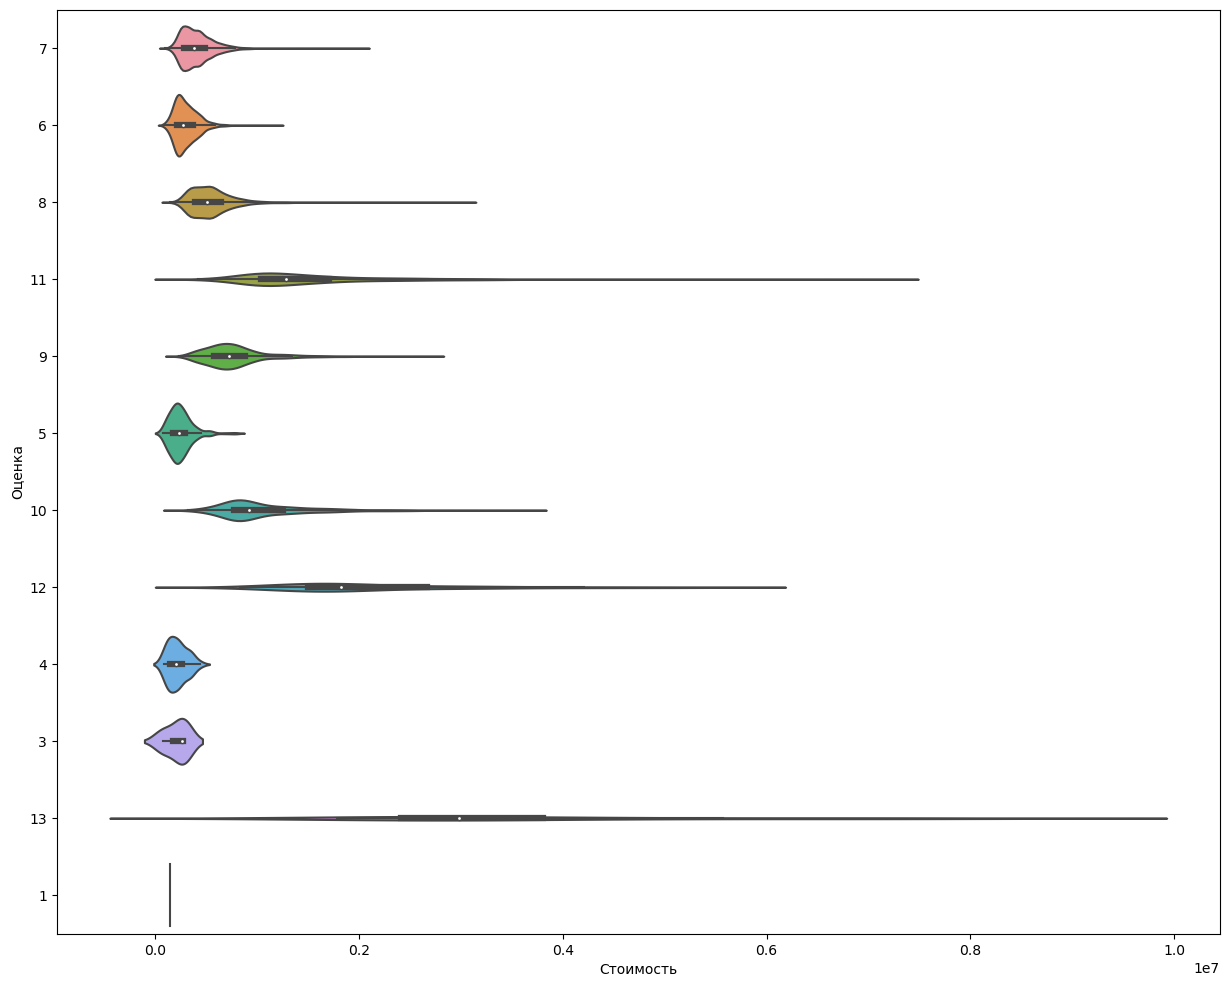

In [77]:
plt.figure(figsize=(15,12))
sns.violinplot(x=df["price"], y=df["grade"].astype('str'))
plt.xlabel("Стоимость")
plt.ylabel("Оценка");

#### Ну что сказать. Хорошо видно, что дома с оценкой 10-13 стоят дороже.

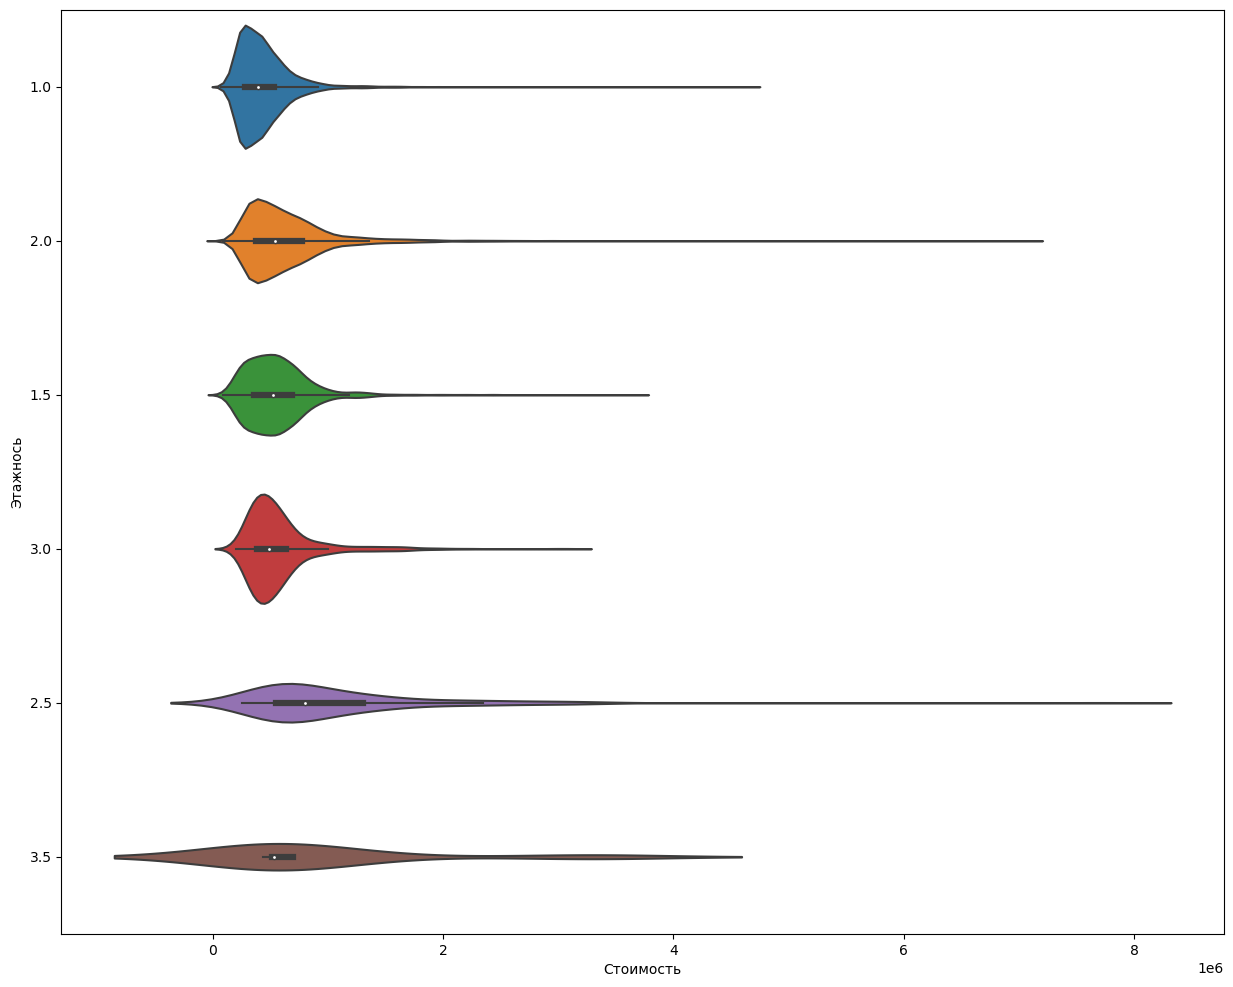

In [80]:
plt.figure(figsize=(15,12))
sns.violinplot(x=df["price"], y=df["floors"].astype('str'))
plt.xlabel("Стоимость")
plt.ylabel("Этажнось");

#### Дома с этажностью 2,5 и 3,5 не имеют определенной цены. И это логично - никто не понимает, что это значит.

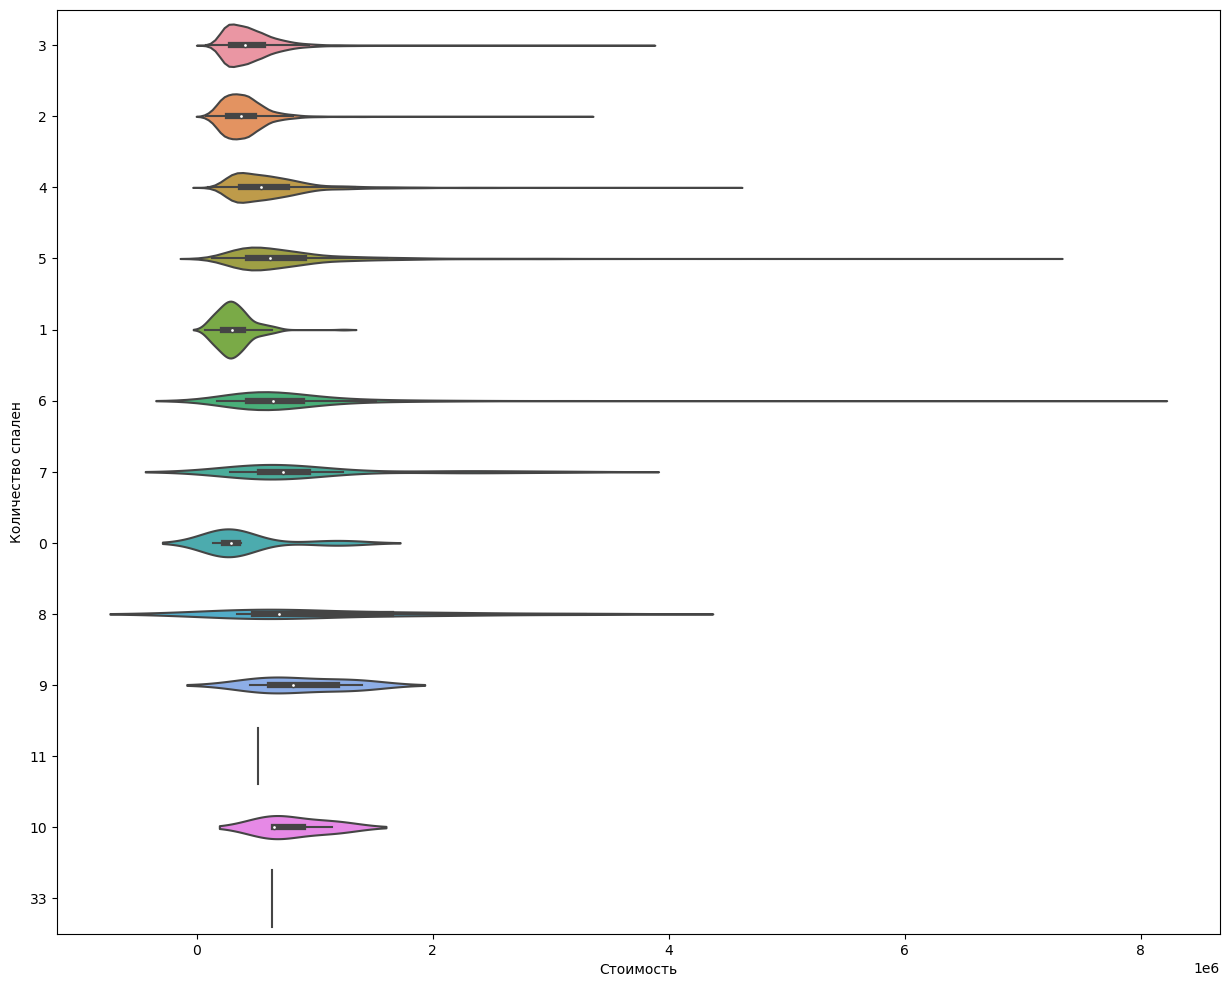

In [82]:
plt.figure(figsize=(15,12))
sns.violinplot(x=df["price"], y=df["bedrooms"].astype('str'))
plt.xlabel("Стоимость")
plt.ylabel("Количество спален");

#### Самый большой разброс по ценам - у домов с 6 спальнями. Самый маленький - у домов с 11 и 33 спальнями. 

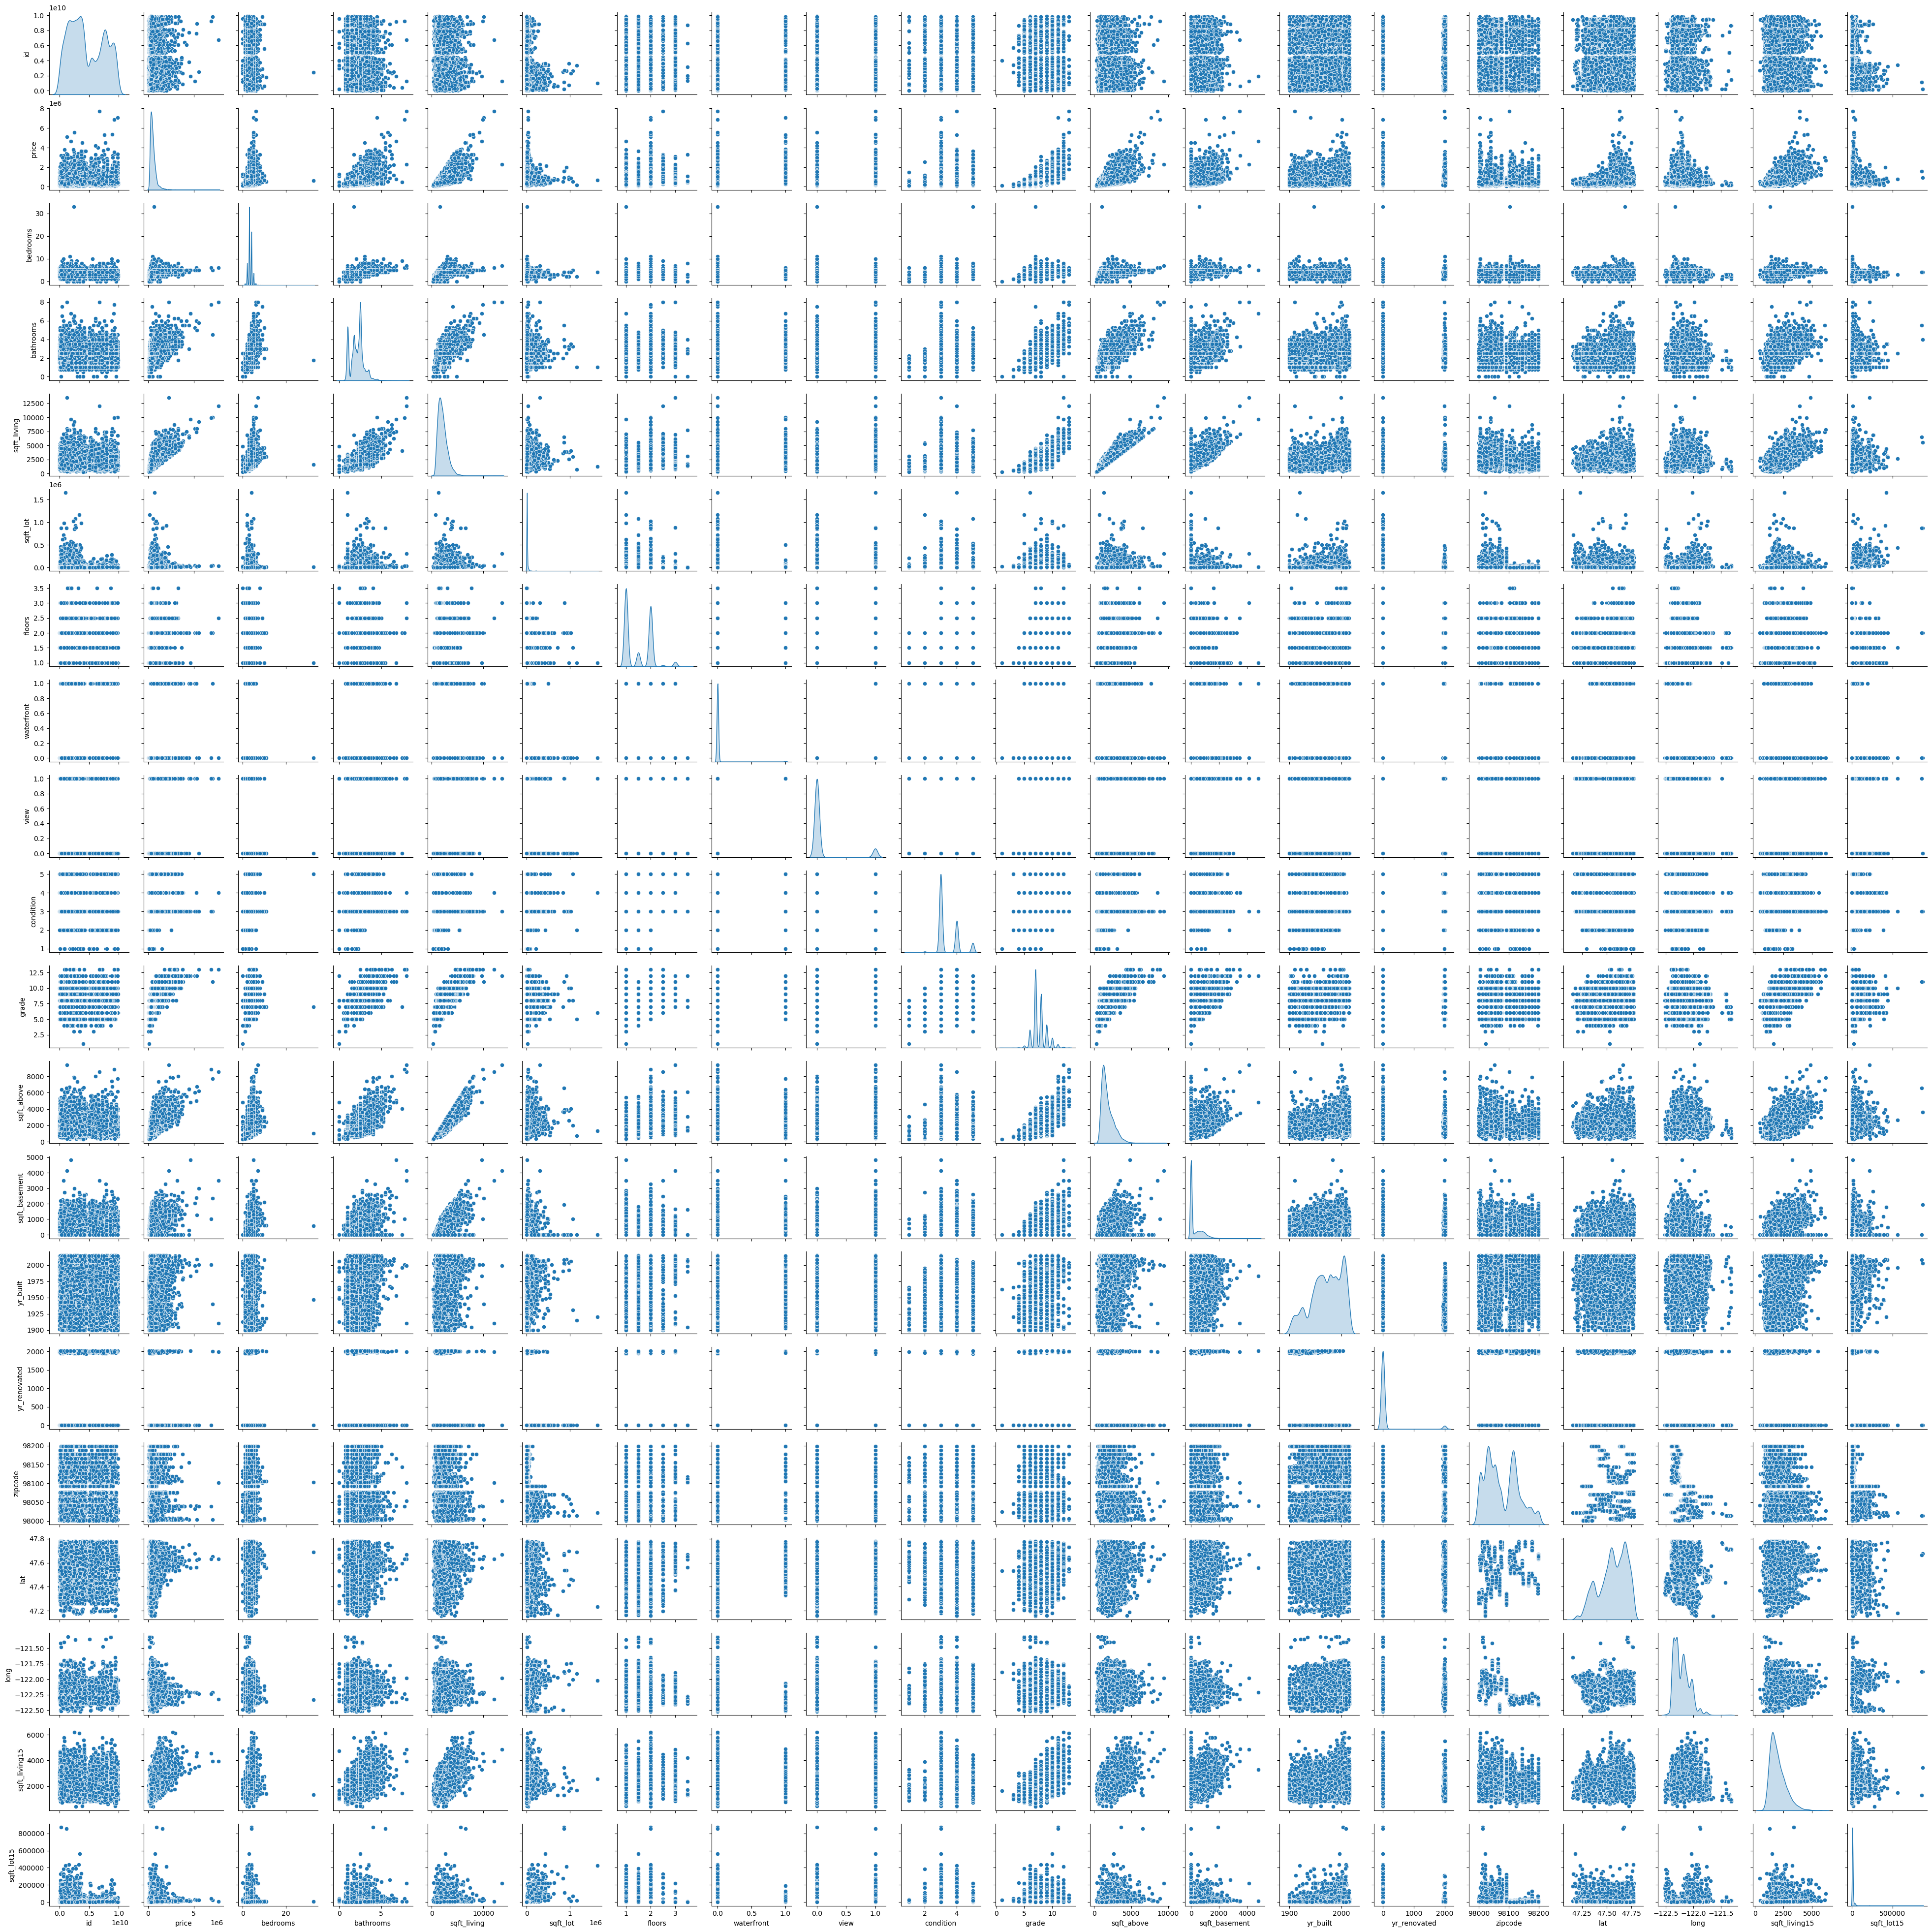

In [83]:
sns.pairplot(df, height=2, kind="scatter", diag_kind="kde")
plt.show()

#### Уволился с работы, закрыл все проекты, чтобы изучить эти данные. 

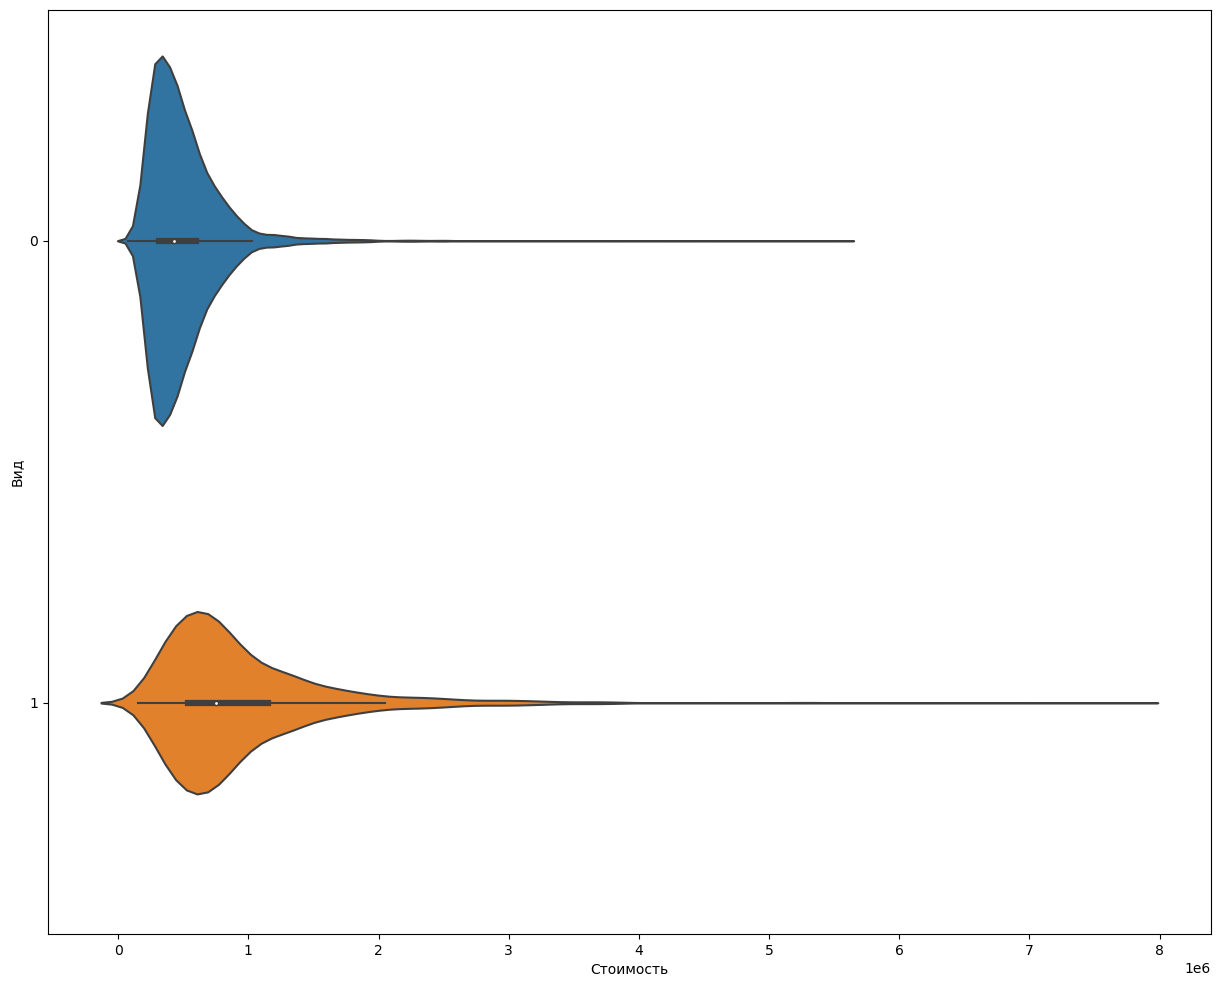

In [85]:
plt.figure(figsize=(15,12))
sns.violinplot(x=df["price"], y=df["view"].astype('str'))
plt.xlabel("Стоимость")
plt.ylabel("Вид");

#### Дома с видом дороже.